In [1]:
display(HTML("<style>.container { width:100% !important; }</style>"))

HTML{String}("<style>.container { width:100% !important; }</style>")

#### MIT License (c) 2019 by Andrew Lyasoff

#### Jupyter notebook written in the Julia 1.1.0. It illustrates some basic operations with large chunks of market data (extracted from public sources), creating histograms from the returns, and other similar operations.

First load the database library.

In [1]:
using Dates
using JuliaDB

The historical quotes are downloaded in .csv format from nasdaq.com and are placed
in the directory "HistoricalQuotes." Before those files can be used here they
must be modified (slightly) in Excel, LibreOffice Calc, or a text editor (e.g., Emacs):
there should be no empty line, or a line that contains a time-stamp (all lines except
the first one must be identically formatted -- this may involve removing the second
line in the spreadhseet). The data for all stocks can be stored in a single variable
(note that HistoricalQuotes is the name of the sub-directory that contains all .csv files).

In [2]:
stocksdata = loadndsparse("HistoricalQuotes"; filenamecol = :ticker, indexcols = [:ticker, :date])

2-d NDSparse with 10076 values (5 field named tuples):
ticker  date       │ close    volume     open     high     low
───────────────────┼──────────────────────────────────────────────
"AAPL"  2008-08-11 │ 24.7943  222653337  24.2957  25.2143  24.2386
"AAPL"  2008-08-12 │ 25.2471  208987793  24.7886  25.6128  24.7871
"AAPL"  2008-08-13 │ 25.6143  210556213  25.4257  25.7143  25.1286
"AAPL"  2008-08-14 │ 25.6171  177684343  25.4757  25.7786  25.4057
"AAPL"  2008-08-15 │ 25.1057  176996663  25.5771  25.6786  25.0071
"AAPL"  2008-08-18 │ 25.0557  137832351  25.0814  25.4014  24.8314
"AAPL"  2008-08-19 │ 24.79    153915766  24.9343  25.2957  24.5443
"AAPL"  2008-08-20 │ 25.12    126718798  24.9676  25.2771  24.8014
"AAPL"  2008-08-21 │ 24.8986  134917270  24.9243  25.0643  24.5557
"AAPL"  2008-08-22 │ 25.2557  109873363  25.1171  25.3571  25.0814
"AAPL"  2008-08-25 │ 24.65    121049286  25.1643  25.1757  24.5228
"AAPL"  2008-08-26 │ 24.8057  111348823  24.68    24.9828  24.6586
           

The same database can now be saved in a special binary format that makes reloading at a later time very fast.  

In [3]:
save(stocksdata, "stocksdata.jdb")

2-d NDSparse with 10076 values (5 field named tuples):
ticker  date       │ close    volume     open     high     low
───────────────────┼──────────────────────────────────────────────
"AAPL"  2008-08-11 │ 24.7943  222653337  24.2957  25.2143  24.2386
"AAPL"  2008-08-12 │ 25.2471  208987793  24.7886  25.6128  24.7871
"AAPL"  2008-08-13 │ 25.6143  210556213  25.4257  25.7143  25.1286
"AAPL"  2008-08-14 │ 25.6171  177684343  25.4757  25.7786  25.4057
"AAPL"  2008-08-15 │ 25.1057  176996663  25.5771  25.6786  25.0071
"AAPL"  2008-08-18 │ 25.0557  137832351  25.0814  25.4014  24.8314
"AAPL"  2008-08-19 │ 24.79    153915766  24.9343  25.2957  24.5443
"AAPL"  2008-08-20 │ 25.12    126718798  24.9676  25.2771  24.8014
"AAPL"  2008-08-21 │ 24.8986  134917270  24.9243  25.0643  24.5557
"AAPL"  2008-08-22 │ 25.2557  109873363  25.1171  25.3571  25.0814
"AAPL"  2008-08-25 │ 24.65    121049286  25.1643  25.1757  24.5228
"AAPL"  2008-08-26 │ 24.8057  111348823  24.68    24.9828  24.6586
           

In [4]:
@time reloaded_stocksdata = load("stocksdata.jdb")

  0.006708 seconds (30.30 k allocations: 725.484 KiB)


2-d NDSparse with 10076 values (5 field named tuples):
ticker  date       │ close    volume     open     high     low
───────────────────┼──────────────────────────────────────────────
"AAPL"  2008-08-11 │ 24.7943  222653337  24.2957  25.2143  24.2386
"AAPL"  2008-08-12 │ 25.2471  208987793  24.7886  25.6128  24.7871
"AAPL"  2008-08-13 │ 25.6143  210556213  25.4257  25.7143  25.1286
"AAPL"  2008-08-14 │ 25.6171  177684343  25.4757  25.7786  25.4057
"AAPL"  2008-08-15 │ 25.1057  176996663  25.5771  25.6786  25.0071
"AAPL"  2008-08-18 │ 25.0557  137832351  25.0814  25.4014  24.8314
"AAPL"  2008-08-19 │ 24.79    153915766  24.9343  25.2957  24.5443
"AAPL"  2008-08-20 │ 25.12    126718798  24.9676  25.2771  24.8014
"AAPL"  2008-08-21 │ 24.8986  134917270  24.9243  25.0643  24.5557
"AAPL"  2008-08-22 │ 25.2557  109873363  25.1171  25.3571  25.0814
"AAPL"  2008-08-25 │ 24.65    121049286  25.1643  25.1757  24.5228
"AAPL"  2008-08-26 │ 24.8057  111348823  24.68    24.9828  24.6586
           

Check the saved database for consistency.

In [5]:
stocksdata == reloaded_stocksdata

true

Look up the data associated only with Apple (symbol AAPL):

In [6]:
stocksdata["AAPL",:]

1-d NDSparse with 2519 values (5 field named tuples):
date       │ close    volume     open     high     low
───────────┼──────────────────────────────────────────────
2008-08-11 │ 24.7943  222653337  24.2957  25.2143  24.2386
2008-08-12 │ 25.2471  208987793  24.7886  25.6128  24.7871
2008-08-13 │ 25.6143  210556213  25.4257  25.7143  25.1286
2008-08-14 │ 25.6171  177684343  25.4757  25.7786  25.4057
2008-08-15 │ 25.1057  176996663  25.5771  25.6786  25.0071
2008-08-18 │ 25.0557  137832351  25.0814  25.4014  24.8314
2008-08-19 │ 24.79    153915766  24.9343  25.2957  24.5443
2008-08-20 │ 25.12    126718798  24.9676  25.2771  24.8014
2008-08-21 │ 24.8986  134917270  24.9243  25.0643  24.5557
2008-08-22 │ 25.2557  109873363  25.1171  25.3571  25.0814
2008-08-25 │ 24.65    121049286  25.1643  25.1757  24.5228
2008-08-26 │ 24.8057  111348823  24.68    24.9828  24.6586
           ⋮
2018-07-27 │ 190.98   23975350   194.99   195.19   190.1
2018-07-30 │ 189.91   20912890   191.9    192.2    189

In [7]:
length(stocksdata["AAPL",:])

2519

Similarly, look up the data linked to Microsoft. 

In [8]:
stocksdata["MSFT",:]

1-d NDSparse with 2519 values (5 field named tuples):
date       │ close   volume    open    high     low
───────────┼───────────────────────────────────────────
2008-08-11 │ 27.9    68729270  27.86   28.4     27.66
2008-08-12 │ 28.12   62796400  27.78   28.36    27.58
2008-08-13 │ 27.91   51162290  28.07   28.5     27.76
2008-08-14 │ 27.91   49642110  27.82   28.28    27.56
2008-08-15 │ 27.81   47266670  27.98   28.15    27.58
2008-08-18 │ 27.69   38041010  27.78   28.05    27.55
2008-08-19 │ 27.32   40307900  27.54   27.75    27.27
2008-08-20 │ 27.29   41483210  27.535  27.58    27.17
2008-08-21 │ 27.18   43614130  27.1    27.23    26.86
2008-08-22 │ 27.84   47892790  27.23   27.88    27.22
2008-08-25 │ 27.66   51372940  27.61   27.84    27.46
2008-08-26 │ 27.27   44773030  27.58   27.72    27.17
           ⋮
2018-07-27 │ 107.68  36916780  110.18  110.18   106.14
2018-07-30 │ 105.37  34495720  107.19  107.53   104.76
2018-07-31 │ 106.08  27181070  106.49  106.72   105.38
2018-08-01 │

In [9]:
length(stocksdata["MSFT",:])

2519

Look up the price of Google on a particular date in the past:

In [10]:
stocksdata["GOOGL", Date(2009,9,9)]

(close = 234.3721, volume = 2191940, open = 231.8918, high = 235.5339, low = 231.7605)

In [11]:
stocksdata["GOOGL", Date(2009,9,9)].close

234.3721

This is how one can look up only the closing prices of Amazon. 

In [12]:
selectvalues(stocksdata,:close)["AMZN",:]

1-d NDSparse with 2519 values (Float64):
date       │
───────────┼────────
2008-08-11 │ 88.09
2008-08-12 │ 87.25
2008-08-13 │ 86.69
2008-08-14 │ 88.03
2008-08-15 │ 86.4
2008-08-18 │ 83.11
2008-08-19 │ 81.29
2008-08-20 │ 82.13
2008-08-21 │ 83.26
2008-08-22 │ 85.26
2008-08-25 │ 82.85
2008-08-26 │ 81.76
           ⋮
2018-07-27 │ 1817.27
2018-07-30 │ 1779.22
2018-07-31 │ 1777.44
2018-08-01 │ 1797.17
2018-08-02 │ 1834.33
2018-08-03 │ 1823.29
2018-08-06 │ 1847.75
2018-08-07 │ 1862.48
2018-08-08 │ 1886.52
2018-08-09 │ 1898.52
2018-08-10 │ 1886.3

In [13]:
keytype(stocksdata)

Tuple{String,Date}

Look up the dates for which the closing prices for Apple are available.

In [14]:
AAPLdate=columns(stocksdata["AAPL",:])[1]

2519-element Array{Date,1}:
 2008-08-11
 2008-08-12
 2008-08-13
 2008-08-14
 2008-08-15
 2008-08-18
 2008-08-19
 2008-08-20
 2008-08-21
 2008-08-22
 2008-08-25
 2008-08-26
 2008-08-27
 ⋮         
 2018-07-26
 2018-07-27
 2018-07-30
 2018-07-31
 2018-08-01
 2018-08-02
 2018-08-03
 2018-08-06
 2018-08-07
 2018-08-08
 2018-08-09
 2018-08-10

Look up the closing prices of Apple on those days.

In [15]:
AAPLclose=columns(stocksdata["AAPL",:])[2]

2519-element Array{Float64,1}:
  24.7943
  25.2471
  25.6143
  25.6171
  25.1057
  25.0557
  24.79  
  25.12  
  24.8986
  25.2557
  24.65  
  24.8057
  24.9528
   ⋮     
 194.21  
 190.98  
 189.91  
 190.29  
 201.5   
 207.39  
 207.99  
 209.07  
 207.11  
 207.25  
 208.88  
 207.53  

In [16]:
stocksdata["AAPL", Date(2008,8,11)].close

24.7943

Now we produce some plots. First load the library that contains the plotting functions. 

In [17]:
using Plots
pyplot()

Plots.PyPlotBackend()

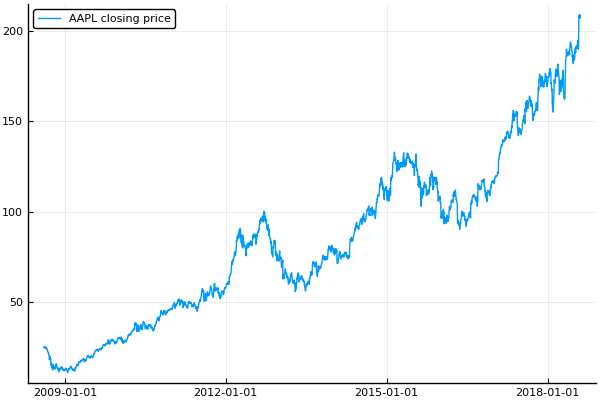

In [18]:
plot(AAPLdate, AAPLclose,label="AAPL closing price")

Calculate the daily returns of AAPL.

In [19]:
llc=length(AAPLclose);
AAPLreturns=(AAPLclose[2:llc]-AAPLclose[1:llc-1])./AAPLclose[1:llc-1];

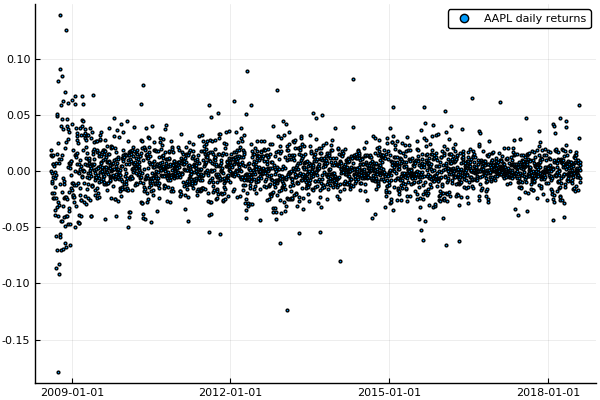

In [20]:
scatter(AAPLdate[2:llc],AAPLreturns,label="AAPL daily returns",markersize=2)

Now build the histogram from the returns using a custom made 'histogram' function
(called 'hstgram' to avoid the confucion with the standard 'histogram').
It takes as an input a single 1-dimensional array of data. The number of bins in
the histogram is determined automatically by using the Diaconis-Friedman rule.
The function returns two arrays: the mid-points of the bins and the (unnormalized)
heights of the bars.

In [21]:
using StatsBase

In [22]:
function hstgram(data_sample::Array{Float64,1})
    data_sorted=sort(data_sample)
    first=data_sorted[1]
    last=data_sorted[end]
    nmb=length(data_sorted)
    IQR=percentile(data_sorted,75)-percentile(data_sorted,25)
    bin_size_loc = 2*IQR*(nmb^(-1.0/3))
    num_bins=Int(floor((last-first)/bin_size_loc))
    bin_size=(last-first)/(num_bins)
    bin_end_points=[first+(i-1)*bin_size for i=1:(num_bins+1)]
    ahist_val=[length(data_sorted[data_sorted .< u]) for u in bin_end_points]
    hist_val=[ahist_val[i+1]-ahist_val[i] for i=1:num_bins]
    mid_bins=[first-bin_size/2+i*bin_size for i=1:num_bins]
    return mid_bins, hist_val
end

hstgram (generic function with 1 method)

Normalize the bars so that the area of the histogram equals 1.

In [23]:
U,V=hstgram(AAPLreturns);
VV=V/(sum(V)*(U[2]-U[1]));

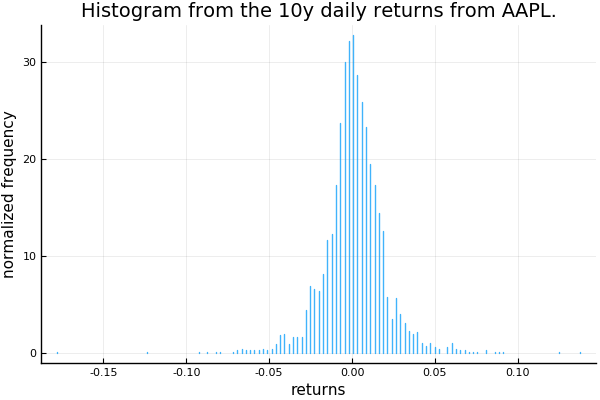

In [24]:
plot(U,VV,line=(:sticks,0.75),label="")
xlabel!("returns")
ylabel!("normalized frequency")
title!("Histogram from the 10y daily returns from AAPL.")

The area of the histogram is indeed 1.

In [25]:
sum(VV)*(U[2]-U[1])

1.0

Here is another way to plot the same histogram:

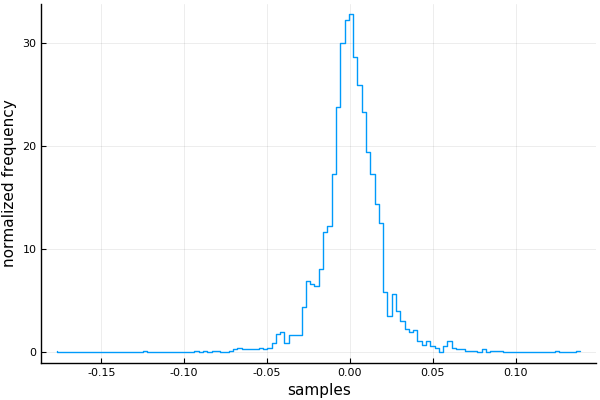

In [26]:
plot(U.+(U[2]-U[1])/2,VV,label="",line=(:steppre,1),linewidth=0.05)
xlabel!("samples")
ylabel!("normalized frequency")

The bars in the histogram can be normalized to give the probabilities for hitting the bins:

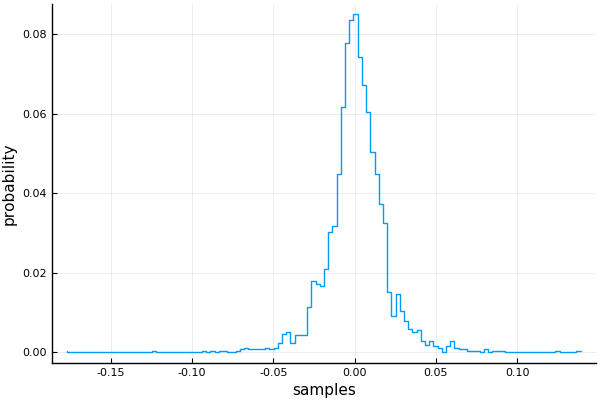

In [28]:
VVV=V/sum(V);
plot(U.+(U[2]-U[1])/2,VVV,label="",line=(:steppre,1),linewidth=0.05)
xlabel!("samples")
ylabel!("probability")

The probabilities do sum to 1.

In [29]:
sum(VVV)

1.0